### Final Project on Neighborhoods (Crime Rate)
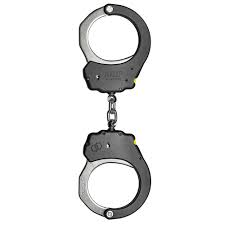

## Introduction
We wanted to identify the best neighborhood regarding crime and will be using data sets involving arrest data, firearm seizure, and populations of neighborhoods.. We will then use the metrics of number of offenses per neighborhood, crime rate per population, and firearm seizures per neighborhood. Therefore our "best" neighborhood will really be the worst in context of crimes.

In [3]:
import pandas as pd


arrest = pd.read_csv("arrest.csv")
seizure = pd.read_csv("seizure.csv")
pop = pd.read_csv("population.csv")

neighborhoods = pd.DataFrame(columns = ["Neighborhood", "Population"])

neighborhoods["Neighborhood"] = pop["Neighborhood"]
neighborhoods["Population"] = pop["Population (2010)"]



    


offenses = pd.DataFrame(columns = ["Offenses"])
offenses["Offenses"] = arrest["INCIDENTNEIGHBORHOOD"]
offenses = offenses["Offenses"].value_counts().sort_values(ascending=False)


neighborhoods




,Neighborhood,Population
0,Allegheny Center,933
1,Allegheny West,462
2,Allentown,2500
3,Arlington,1869
4,Arlington Heights,244
...,...,...
85,Upper Lawrenceville,2669
86,West End,254
87,West Oakland,2604
88,Westwood,3066


# We have the data retrieved from 90 different neighborhoods and their respective populations.

In [4]:
offenses

Central Business District    4276
South Side Flats             3396
Carrick                      2311
East Allegheny               2161
Homewood South               2057
                             ... 
Regent Square                  36
Central Northside              23
Mt. Oliver Boro                18
Troy Hill-Herrs Island          6
Mt. Oliver Neighborhood         2
Name: Offenses, Length: 98, dtype: int64

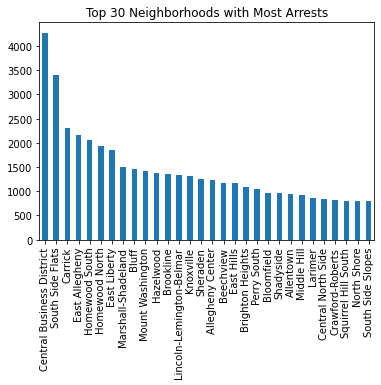

In [5]:
offenses.iloc[:30].plot(kind='bar', x="Neighborhood", y="Crimes", title="Top 30 Neighborhoods with Most Arrests")



Here we have a graph of the top 30 neighborhoods with the most arrests reported. 
We will compare this graph to a graph of population of the same neighborhoods.

In general, Central Busienss District had the most crimes at 4,276 reported. That means that this fulfills our first metric of total arrests, indicating for now that Central Business District is the worst neighborhood.

# However, we can expand on this with possibly more evidence by correlating it with the other data sources to produce a more supported conclusion

In [6]:
neighborhoodpop = pd.DataFrame()
offending = {}

#Here I created seperate lists to store the top 30 neighborhoods we just identified and another list ot store their respective populations.

#To do this, I iterated through the population data set of each neighborhood and comparing each row's neighborhood name to
#the neighborhood name of the current index of the sorted neighborhood list. This got the correct population.
for index, row in arrest.iterrows():
    if row["INCIDENTNEIGHBORHOOD"] in offending:
        offending[row["INCIDENTNEIGHBORHOOD"]] = offending[row["INCIDENTNEIGHBORHOOD"]] + 1
    else:
        offending[row["INCIDENTNEIGHBORHOOD"]] = 1
offending_sorted =  sorted(offending, key=offending.get, reverse=True)
offending_sorted[26] = 'Central Northside'
neighborhoodpop["Neighborhoods"] = offending_sorted
averageCrime = pd.DataFrame()
averageCrime["Neighborhoods"] = offending_sorted
offending_sortedpop = {}
#matching index of name and population
for key in offending_sorted:
    word = key
    indexOf = offending_sorted.index(word)
    for index, row in pop.iterrows():
        if word == row["Neighborhood"]:
           populations = row["Population (2010)"]
           offending_sorted[indexOf] = populations
            
#declaring the new dataframe that holds the neighborhoods and popualtions instead of total arrests.
neighborhoodpop["Populations"] = offending_sorted
neighborhoodpop = neighborhoodpop.dropna()



neighborhoodpop.iloc[:30]

,Neighborhoods,Populations
0,Central Business District,3629
1,South Side Flats,6597
3,Carrick,10113
4,East Allegheny,2136
5,Homewood South,2344
6,Homewood North,3280
7,East Liberty,5869
8,Marshall-Shadeland,6043
9,Bluff,6600
10,Mount Washington,8799


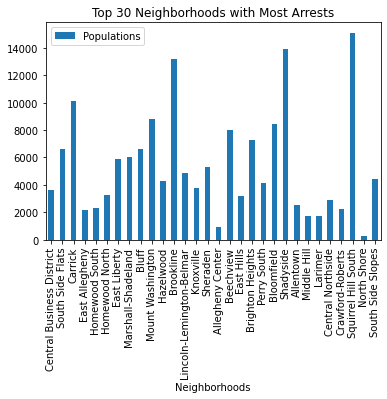

In [7]:
neighborhoodpop.iloc[:30].plot(kind = 'bar', x="Neighborhoods", y="Populations", title="Top 30 Neighborhoods with Most Arrests")

# As we can see, cities with lower population but higher total arrests would be worse to live at as this means their average crime rate per person is higher. This will be another metric we will use.
In this scenario, Central Business District has a very low population for its total crimes.
To further illustrate this, I will calculate the mean crimes per person by dividing the crimes by total people.

In [ ]:

mean = {}
for index, row in arrest.iterrows():
    if row["INCIDENTNEIGHBORHOOD"] in mean:
        mean[row["INCIDENTNEIGHBORHOOD"]] = mean[row["INCIDENTNEIGHBORHOOD"]] + 1
    else:
        mean[row["INCIDENTNEIGHBORHOOD"]] = 1
mean_sorted =  sorted(mean, key=mean.get, reverse=True)
#matching index of name and population
for key in mean_sorted:
    word2 = key
    populations2 = 0
    indexOf2 = mean_sorted.index(word2)
    for index, row in arrest.iterrows():
        if word2 == row["INCIDENTNEIGHBORHOOD"]:
           populations2 = populations2 + 1
           mean_sorted[indexOf2] = populations2
print(mean_sorted)
print(offending_sorted)